In [127]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
# from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pyodbc
import FinanceLib as fl
import numpy as np
from datetime import datetime
# style.use('ggplot')


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
fname  = 'C:/Users/40KravchukPV.REGION/Documents/Courses/FinanceProject Local/DB.config'
# fname  = 'C:/Dev/Python/FinanceProject/config'
config_dict = fl.ReadConnConfig(fname)
con = pyodbc.connect(driver = config_dict['DRIVER'],server = config_dict['SERVER'], port = config_dict['PORT'], database = config_dict['DATABASE'], UID = config_dict['UID'], PWD = config_dict['PWD'], autocommit=True)

In [21]:
tickers_list = ['ES', 'AAPL', 'AES', 'AIG']

In [98]:
df = fl.GetStockQuoteFromDB(con, tickers_list, IsDtIndex = 1, IsStockIndex = 0, DateFrom = 'NULL', DateTo = 'NULL')

In [23]:
df.head()

,Stock,OpenValue,HighValue,LowValue,CloseValue,AdjClose,Volume,LoadDt
Dt,,,,,,,,
2015-12-31,AAPL,26.752501,26.757500,26.205000,26.315001,24.380093,163649200.0,2021-01-28 19:49:35.147
2015-12-31,AES,9.500000,9.730000,9.370000,9.570000,7.774692,5060200.0,2021-01-28 19:55:02.120
2015-12-31,AIG,62.299999,62.740002,61.959999,61.970001,54.062973,4909600.0,2021-01-28 19:55:51.460
2015-12-31,ES,51.889999,51.900002,50.549999,51.070000,43.896469,2081200.0,2021-01-28 20:53:03.533
2016-01-04,AAPL,25.652500,26.342501,25.500000,26.337500,24.400942,270597600.0,2021-01-28 19:49:35.160


In [97]:
data = fl.GetAdjCloseInCol(tickers_list, df)

In [25]:
data.head()

,ES,AAPL,AES,AIG
Dt,,,,
2015-12-31,24.380093,24.380093,24.380093,24.380093
2015-12-31,7.774692,7.774692,7.774692,7.774692
2015-12-31,54.062973,54.062973,54.062973,54.062973
2015-12-31,43.896469,43.896469,43.896469,43.896469
2016-01-04,24.400942,24.400942,24.400942,24.400942


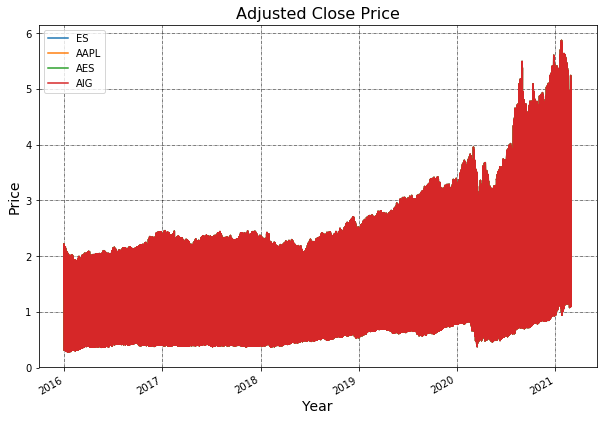

In [26]:
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))
# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k',  linestyle='-.', linewidth=0.5)
plt.show()

In [38]:
data.pct_change().sort_index(ascending=False).head(10)

,ES,AAPL
Dt,,
2021-01-29,-0.336920,-0.336920
2021-01-29,0.480368,0.480368
2021-01-28,-0.349770,-0.349770
2021-01-28,0.548515,0.548515
2021-01-27,-0.376813,-0.376813
2021-01-27,0.580376,0.580376
2021-01-26,-0.372101,-0.372101
2021-01-26,0.585558,0.585558
2021-01-25,0.635053,0.635053


In [27]:
df_change = df.drop(['OpenValue', 'HighValue', 'LowValue', 'CloseValue', 'Volume', 'LoadDt'], axis=1)

In [32]:
df_change['AdjClose'].pct_change().loc['2021-01-29']

Dt
2015-12-31         NaN
2015-12-31    0.800505
2016-01-04   -0.444125
2016-01-04    0.792274
2016-01-05   -0.456031
                ...   
2021-01-27   -0.376813
2021-01-28    0.548515
2021-01-28   -0.349770
2021-01-29    0.480368
2021-01-29   -0.336920
Name: AdjClose, Length: 2558, dtype: float64

In [ ]:
len(df_change.loc['2021-01-01':'2021-01-29'].index)

In [69]:
len(df_change.loc['2021-01-01':'2021-01-29'].groupby('Dt'))

19

In [28]:
df_change['Change'] = df_change.groupby('Stock').AdjClose.pct_change()
df_change['Change7'] = df_change.groupby('Stock').AdjClose.pct_change(7)
df_change['Change30'] = df_change.groupby('Stock').AdjClose.pct_change(30)
df_change['Change90'] = df_change.groupby('Stock').AdjClose.pct_change(90)
df_change['Change180'] = df_change.groupby('Stock').AdjClose.pct_change(180)
df_change['Change360'] = df_change.groupby('Stock').AdjClose.pct_change(360)

In [36]:
df_change.head()

,Stock,AdjClose,Change,Change7,Change30,Change90,Change180,Change360
Dt,,,,,,,,
2015-12-31,AAPL,24.380093,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,AES,7.774692,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,AIG,54.062973,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,ES,43.896469,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,AAPL,24.400942,0.000855,NaN,NaN,NaN,NaN,NaN


In [80]:
# df_change.loc['2021-01-27']
# pd.DatetimeIndex(df_change['Dt']).month

# df['purchase_date'].dt.floor('d') - pd.offsets.MonthBegin(1)
# df_change.index.floor('d')
# from datetime import date
# print(date(date.today().year, 1, 1))
# > date(date.today().year, 1, 1)
from datetime import datetime
from datetime import date
sum(i > date(date.today().year, 1, 1) for i in set(df_change.index))
sum(i > datetime.today().replace(day=1) for i in set(df_change.index))

2

In [75]:
date.today().month

3

In [85]:
len(df_change.loc['2021-03-01':'2021-03-03'].groupby('Dt'))

3

In [92]:
datetime.today().replace(day=1)

datetime.datetime(2021, 3, 1, 17, 30, 6, 468150)

In [88]:
sum(i >= datetime.today().replace(day=1) for i in set(df_change.index))

2

In [86]:
df_change.groupby('Stock').AdjClose.pct_change(len(df_change.loc['2021-03-01':'2021-03-03'].groupby('Dt')))

Dt
2015-12-31         NaN
2015-12-31         NaN
2015-12-31         NaN
2015-12-31         NaN
2016-01-04         NaN
                ...   
2021-03-02    0.001986
2021-03-03    0.006597
2021-03-03    0.012425
2021-03-03    0.069625
2021-03-03   -0.021389
Name: AdjClose, Length: 5192, dtype: float64

In [94]:
df_change.groupby('Stock').AdjClose.pct_change(sum(i >= date(df_change.index).replace(day=1) for i in set(df_change.index)))

TypeError: an integer is required (got type DatetimeIndex)

In [51]:
list(df_change.index) > date(date.today().year, 1, 1)

[Timestamp('2015-12-31 00:00:00'),
 Timestamp('2015-12-31 00:00:00'),
 Timestamp('2015-12-31 00:00:00'),
 Timestamp('2015-12-31 00:00:00'),
 Timestamp('2016-01-04 00:00:00'),
 Timestamp('2016-01-04 00:00:00'),
 Timestamp('2016-01-04 00:00:00'),
 Timestamp('2016-01-04 00:00:00'),
 Timestamp('2016-01-05 00:00:00'),
 Timestamp('2016-01-05 00:00:00'),
 Timestamp('2016-01-05 00:00:00'),
 Timestamp('2016-01-05 00:00:00'),
 Timestamp('2016-01-06 00:00:00'),
 Timestamp('2016-01-06 00:00:00'),
 Timestamp('2016-01-06 00:00:00'),
 Timestamp('2016-01-06 00:00:00'),
 Timestamp('2016-01-07 00:00:00'),
 Timestamp('2016-01-07 00:00:00'),
 Timestamp('2016-01-07 00:00:00'),
 Timestamp('2016-01-07 00:00:00'),
 Timestamp('2016-01-08 00:00:00'),
 Timestamp('2016-01-08 00:00:00'),
 Timestamp('2016-01-08 00:00:00'),
 Timestamp('2016-01-08 00:00:00'),
 Timestamp('2016-01-11 00:00:00'),
 Timestamp('2016-01-11 00:00:00'),
 Timestamp('2016-01-11 00:00:00'),
 Timestamp('2016-01-11 00:00:00'),
 Timestamp('2016-01-

In [18]:
df_change['ActualYear'] = df_change.groupby('Stock').AdjClose.pct_change(len(df_change.loc['2021-01-01':'2021-01-31'].groupby('Dt')))
df_change['ActualMonth'] = df_change.groupby('Stock').AdjClose.pct_change(len(df_change.loc['2021-02-01':'2021-02-01'].groupby('Dt')))

In [101]:
def GetPctChange(df):
    df_change = df.drop(['OpenValue', 'HighValue', 'LowValue', 'CloseValue', 'Volume', 'LoadDt'], axis=1)
    
    df_change['Change'] = df_change.groupby('Stock').AdjClose.pct_change()
    df_change['Change7'] = df_change.groupby('Stock').AdjClose.pct_change(7)
    df_change['Change30'] = df_change.groupby('Stock').AdjClose.pct_change(30)
    df_change['Change90'] = df_change.groupby('Stock').AdjClose.pct_change(90)
    df_change['Change180'] = df_change.groupby('Stock').AdjClose.pct_change(180)
    df_change['Change360'] = df_change.groupby('Stock').AdjClose.pct_change(360)
    return df_change
#     df_change['ActualYear'] = df_change.groupby('Stock').AdjClose.pct_change(len(df_change.loc['2021-01-01':'2021-01-31'].groupby('Dt')))
#     df_change['ActualMonth'] = df_change.groupby('Stock').AdjClose.pct_change(len(df_change.loc['2021-02-01':'2021-02-01'].groupby('Dt')))
    

In [108]:
fl.GetPctChange(df).loc['2021-03-01']

,Stock,AdjClose,Change,Change7,Change30,Change90,Change180,Change360
Dt,,,,,,,,
2021-03-01,AAPL,127.790001,0.053851,-0.055995,-0.009226,0.056279,0.538311,1.340343
2021-03-01,AES,27.000000,0.016566,-0.053628,0.067484,0.394749,0.846039,0.776638
2021-03-01,AIG,45.310001,0.030944,0.094444,0.124876,0.540577,0.183098,-0.178645
2021-03-01,ES,80.730003,0.015727,-0.052131,-0.095057,-0.114941,-0.067588,0.002671


In [123]:
returns = data.pct_change()

In [125]:
returns.reset_index(drop=True, inplace=True)

In [126]:
returns

,ES,AAPL,AES,AIG
0,NaN,NaN,NaN,NaN
1,-0.681105,-0.681105,-0.681105,-0.681105
2,5.953713,5.953713,5.953713,5.953713
3,-0.188049,-0.188049,-0.188049,-0.188049
4,-0.444125,-0.444125,-0.444125,-0.444125
...,...,...,...,...
5187,0.756310,0.756310,0.756310,0.756310
5188,0.512141,0.512141,0.512141,0.512141
5189,-0.779699,-0.779699,-0.779699,-0.779699
5190,0.748234,0.748234,0.748234,0.748234


In [128]:
returns+1

,ES,AAPL,AES,AIG
0,NaN,NaN,NaN,NaN
1,0.318895,0.318895,0.318895,0.318895
2,6.953713,6.953713,6.953713,6.953713
3,0.811951,0.811951,0.811951,0.811951
4,0.555875,0.555875,0.555875,0.555875
...,...,...,...,...
5187,1.756310,1.756310,1.756310,1.756310
5188,1.512141,1.512141,1.512141,1.512141
5189,0.220301,0.220301,0.220301,0.220301
5190,1.748234,1.748234,1.748234,1.748234


In [129]:
np.prod(returns+1)

ES      3.190308
AAPL    3.190308
AES     3.190308
AIG     3.190308
dtype: float64

In [114]:
(((returns+1).prod()-1)*100).round(2)

ES      219.03
AAPL    219.03
AES     219.03
AIG     219.03
dtype: float64

In [20]:
pip install pandasgui

ERROR: spyder 4.1.3 has requirement pyqt5<5.13; python_version >= "3", but you'll have pyqt5 5.15.2 which is incompatible.
ERROR: spyder 4.1.3 has requirement pyqtwebengine<5.13; python_version >= "3", but you'll have pyqtwebengine 5.15.2 which is incompatible.


  Created wheel for pandasgui: filename=pandasgui-0.2.7-py3-none-any.whl size=6931296 sha256=4312843445fbcd2bf312ae334f726f8efbf716d6ee1a0140e1408cd2f74cbe54
  Stored in directory: c:\users\petr\appdata\local\pip\cache\wheels\06\79\30\fed1fa2d679573ad9e85a5ede31538f6a7b78dcf8ad4ab099e
Successfully built pandasgui


In [21]:
from pandasgui import show
gui = show(df_change)

In [1]:
pip install bamboolib


  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13055 sha256=0ba35f8032726f728fe4527d90e88f34769cebcbf1beb2478b55336b3eff9c2a
  Stored in directory: c:\users\petr\appdata\local\pip\cache\wheels\d2\3c\58\2ff786414b21713edc6f4fdb54fdee89ac37bca5edd1f60634
  Created wheel for qgrid: filename=qgrid-1.3.1-py2.py3-none-any.whl size=1761262 sha256=a5fa730a805cb98fa36971f0a22b4da4ddb618c9c3cad0aa0a8e80299fbfd179
  Stored in directory: c:\users\petr\appdata\local\pip\cache\wheels\53\87\cb\c63a58774627471976061afb5b8657b76d2268c1e76e980586
Successfully built ppscore qgrid
  Attempting uninstall: attrs
    Found existing installation: attrs 19.3.0
    Uninstalling attrs-19.3.0:
      Successfully uninstalled attrs-19.3.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
  Attempting uninstall: plotly
    Found existing installation: plotly 4.7.1
    Uninstalling plo

In [ ]:
jupyter nbextension enable --py qgrid --sys-prefix
jupyter nbextension enable --py widgetsnbextension --sys-prefix
jupyter nbextension install --py bamboolib --sys-prefix
jupyter nbextension enable --py bamboolib --sys-prefix

In [1]:
import bamboolib as bam
import pandas as pd
data = pd.read_csv(bam.titanic_csv)
bam.show(data)

In [ ]:
https://medium.com/nuances-of-programming/bamboolib-%D0%B8%D0%B7%D1%83%D1%87%D0%B0%D0%B9%D1%82%D0%B5-%D0%B8-%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D0%B9%D1%82%D0%B5-pandas-%D0%B1%D0%B5%D0%B7-%D0%BD%D0%B0%D0%BF%D0%B8%D1%81%D0%B0%D0%BD%D0%B8%D1%8F-%D0%BA%D0%BE%D0%B4%D0%B0-1ed405f6c92d
https://towardsdatascience.com/how-to-create-an-interactive-dropdown-in-jupyter-322277f58a68    